# 7 Linear Regression with TensorFlow using the California Housing Dataset

The goal of this exercise is to implement a linear regression model using TensorFlow to predict house prices based on the California Housing Dataset. The dataset contains various features such as average income, housing average age, and more. Your task is to build a linear regression model and evaluate its performance.

Import the required libraries:

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Load the California Housing Dataset

In [2]:
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
print(X.head())
y = pd.Series(raw['target'])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Preprocess the data:
* Normalize the features using the mean and standard deviation.
* Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Note that X is now an ndarray
print(X[:5, :])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]


Define the TensorFlow graph:
* Create placeholders for the input features (X) and target variable (y).
* Create variables for the model's weights (W) and bias (b).
* Define the linear regression model using the equation: y_pred = X * W + b.
* Define the loss function as the mean squared error between the predicted values and the true values.
* Choose an optimizer (e.g., Gradient Descent) to minimize the loss function.

In [4]:
tf.compat.v1.disable_eager_execution()
X_placeholder = tf.compat.v1.placeholder(tf.float32, shape=[None, X_train.shape[1]])
y_placeholder = tf.compat.v1.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.compat.v1.random_normal([X_train.shape[1], 1]))
b = tf.Variable(tf.compat.v1.random_normal([1]))

y_pred = tf.matmul(X_placeholder, W) + b

loss = tf.reduce_mean(tf.square(y_pred - y_placeholder))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss)

Train the model:
* Initialize TensorFlow session.
* Initialize the model's variables.
* Set the number of training epochs and the learning rate.
* For each epoch, iterate through the training dataset and update the model's parameters using the optimizer.
* Print the training loss at regular intervals.

In [14]:
batch_size = 56
num_epochs = 64

with tf.compat.v1.Session() as tfsession:
    tfsession.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(num_epochs):
        for i in range(0, X_train.shape[0], batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            tfsession.run(train_op, feed_dict={X_placeholder: batch_X, y_placeholder: batch_y})

        train_loss = tfsession.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        print(f"Epoch {epoch}: Training Loss = {train_loss}")


    test_loss = tfsession.run(loss, feed_dict={X_placeholder: X_test, y_placeholder: y_test})
    print(f"Test Loss: {test_loss}")

    y_pred_test = tfsession.run(y_pred, feed_dict={X_placeholder: X_test})

Epoch 0: Training Loss = 1.7532774209976196
Epoch 1: Training Loss = 1.5345040559768677
Epoch 2: Training Loss = 1.4316670894622803
Epoch 3: Training Loss = 1.383592963218689
Epoch 4: Training Loss = 1.3605523109436035
Epoch 5: Training Loss = 1.34916353225708
Epoch 6: Training Loss = 1.34336519241333
Epoch 7: Training Loss = 1.340332269668579
Epoch 8: Training Loss = 1.3387062549591064
Epoch 9: Training Loss = 1.3378143310546875
Epoch 10: Training Loss = 1.3373148441314697
Epoch 11: Training Loss = 1.3370290994644165
Epoch 12: Training Loss = 1.336862564086914
Epoch 13: Training Loss = 1.3367631435394287
Epoch 14: Training Loss = 1.336702823638916
Epoch 15: Training Loss = 1.336665153503418
Epoch 16: Training Loss = 1.3366409540176392
Epoch 17: Training Loss = 1.3366254568099976
Epoch 18: Training Loss = 1.3366152048110962
Epoch 19: Training Loss = 1.3366081714630127
Epoch 20: Training Loss = 1.3366031646728516
Epoch 21: Training Loss = 1.3365998268127441
Epoch 22: Training Loss = 1.3

Evaluate the model:
* Use the trained model to make predictions on the test dataset.
* Calculate the mean squared error (MSE) between the predicted and true values.
* Print the MSE as a measure of the model's performance.

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

1.2784725291964272

* Plot the differences between True and Predicted values

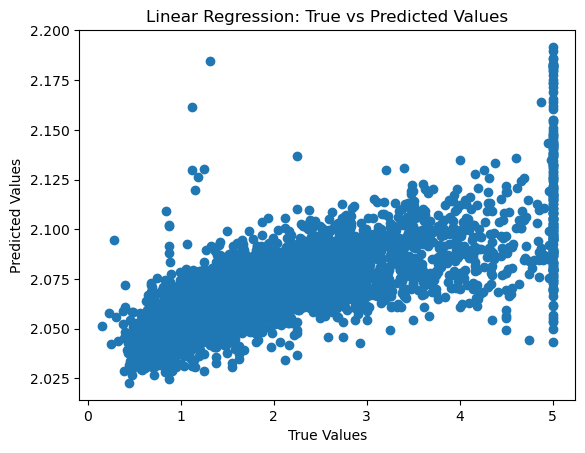

In [16]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()